<a href="https://colab.research.google.com/github/SandeshBashyal/naamii_labs_2023/blob/main/Lab_3_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Multi-model AI with Transformer: A Tutorial**

4th Nepal AI School, Kathmandu

Based on: Unified-IO: A Unified Model for Vision, Language, and Multi-Modal Tasks https://arxiv.org/pdf/2206.08916


Install pacakges once and downlaod the model weights

In [ ]:
#!pip install sentencepiece
#!pip install transformers
#!pip install einops
#!pip install flax
#!pip install absl-py
# If needed, download the model using the following command
#!wget https://ai2-prior-uio.s3.us-west-2.amazonaws.com/public/model-weights-bin/small_1000k.bin -O small.bin 

Prepare the model.

In [1]:
import numpy as np
import matplotlib.pylab as plt
from torchvision.io import read_image
import urllib.request
from PIL import Image
import sys

from google.colab import drive
drive.mount('/content/gdrive')
sys.path.append('/content/gdrive/My Drive/Colab Notebooks/unifiedIO/my_uio/')

import utils
import runner
uio = runner.ModelRunner("small", "/content/gdrive/My Drive/Colab Notebooks/unifiedIO/my_uio/small_1000k.bin")

MessageError: ignored

Not so important code. Mostly for visualization. You can jump to the next cells.

In [ ]:
import matplotlib.patches as patches

def show_images(images, nrow=3, scale=6):
    if len(images.shape) == 4 and images.shape[0] == 1:
        images = images[0]
    if len(images.shape) == 3:
        fig, ax = plt.subplots()
        ax.set_xticklabels([])
        ax.set_yticklabels([])    
        ax.imshow(images)
        plt.show()
    else:
        n = images.shape[0]
        ncol = (n + nrow - 1) // nrow
        if ncol == 1:
            nrow = min(nrow, n)
        fig, axes = plt.subplots(ncol, nrow, sharex=True, sharey=True, figsize=(scale*nrow, scale*ncol))
        if ncol > 1:
            axes = [item for rows in axes for item in rows]
        i = 0
        for ax, im in zip(axes, images):
            ax.imshow(im)
            ax.set_xticklabels([])
            ax.set_yticklabels([])
        fig.subplots_adjust(wspace=0, hspace=0)
        fig.show()

def show_location(input_image, boxes, labels=None):
    fig, ax = plt.subplots()
    ax.set_xticklabels([])
    ax.set_yticklabels([])    
    for i in range(len(boxes)):
        x1, y1, x2, y2 = boxes[i].tolist()
        w = x2 - x1
        h = y2 - y1
        rect = patches.Rectangle((x1, y1), w, h, linewidth=1, edgecolor='r', facecolor='none')
        if labels is not None:
            plt.text(x1, y1, labels[i], color='r')
        ax.add_patch(rect)
    
    ax.imshow(input_image)
    plt.show()    
    
def show_pose(boxes, labels, image):
    fig, ax = plt.subplots()
    ax.set_xticklabels([])
    ax.set_yticklabels([])    
    for x1, y1 in boxes[labels > 0]:
        rect = patches.Rectangle((x1, y1), 4, 4, linewidth=1, edgecolor='r', facecolor='r')
        ax.add_patch(rect)    
    ax.imshow(image)
    plt.show()
  
def load_image_from_url(url):
    with urllib.request.urlopen(url) as f:
        img = Image.open(f)
        return np.array(img)

Load your favourate images.

In [ ]:
flag_img = load_image_from_url('https://as2.ftcdn.net/v2/jpg/03/34/75/17/1000_F_334751725_rzUCTLskxyrFhR2DD3zACdIiepyygIEO.jpg')
school_img = load_image_from_url('https://coinsrs.no/wp-content/uploads/2019/01/Ashish_Dikshya_NepalWinterSchool.jpeg')
#your_img = load_image_from_url('link_to_your_image')

1. Image Captioning!

In [ ]:
uio.caption(flag_img)["text"]

'a red flag is flying in the air'

2. Visual Question Answering (VQA)!

In [ ]:
uio.vqa(flag_img, "what is in the background?")["text"]

'mountain'

3. Open-class Classification!

In [ ]:
out = uio.image_classification(flag_img, answer_options=["city","house","temple","landscape"])
out

{'text': 'landscape', 'score': array([15.613237], dtype=float32)}

4. Open-class Object Detection!

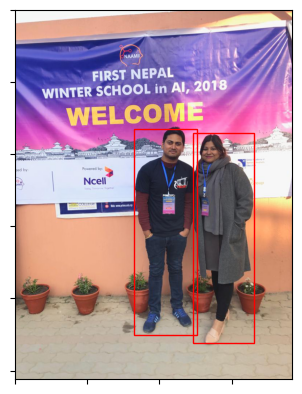

{'boxes': array([[330.752, 329.728, 503.808, 900.096],
        [493.568, 340.992, 661.504, 922.624]]),
 'text': ['<extra_id_678><extra_id_677><extra_id_121><extra_id_508> person<extra_id_667><extra_id_518><extra_id_0><extra_id_354> person'],
 'score': array([[-34.94407]], dtype=float32),
 'text_tokens': array([[[32678, 32677, 32121, 32508,   568, 32667, 32518, 32099, 32354,
            568,     1,     1,     1,     1,     1,     1,     1,     1,
              1,     1,     1,     1,     1,     1,     1,     1,     1,
              1,     1,     1,     1,     1, 39159]]], dtype=int32)}

In [ ]:
out = uio.refexp(school_img, "person")
show_location(school_img, out["boxes"])

5. Image Segmentation

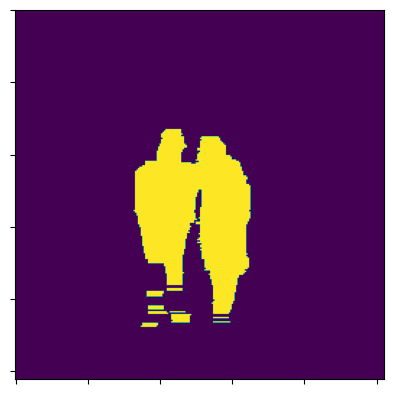

In [ ]:
out = uio.object_segmentation(school_img, "person")
show_images(np.expand_dims(np.stack(out["mask"]), -1))

6. Depth from Single Image!

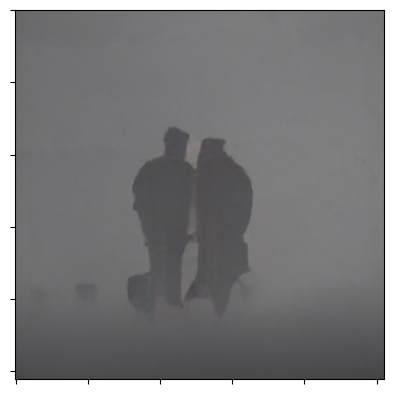

In [ ]:
out = uio.depth(school_img, num_decodes=None)
show_images(out["image"])

7. Image Generation!

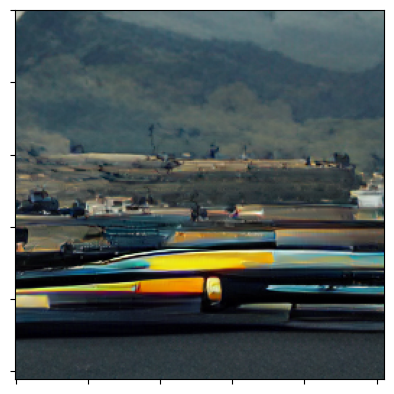

In [ ]:
out = uio.image_generation("Trains running in Nepal with mountains in the background.", num_decodes=1)
show_images(out["image"])